In [1]:
# Required Python Libraries
"""
Input/Output: os
Data Manipulation: pandas
Visualization: matplotlib, seaborn, plotly
Statistical Analysis: numpy, scipy, statsmodels
"""
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import statsmodels as sm
import statsmodels.formula.api as smf
import plotly.express as px
import plotly.offline as py

# Try importing bubbly after installing it
try:
    import bubbly
except ModuleNotFoundError:
    print("bubbly module not found. Please make sure it's installed.")


bubbly module not found. Please make sure it's installed.


In [2]:
# Define File Path : Replace xxxxx with appropriate File Path
file_path = r'/PRODUCT SALES.csv'
# Import & Read Dataset
df = pd.read_csv(file_path)

# Display Dataset Information
df.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Age_Group_NUMBER,Customer_Gender,Country,Product_Category,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,01-01-2017,1,January,2017,17,Youth (<25),1,M,canada,Bikes,2,1519,2443,1848,3038,4886
1,01-01-2017,1,January,2017,23,Youth (<25),1,M,Australia,Bikes,2,1252,2295,2086,2504,4590
2,01-01-2017,1,January,2017,33,Young Adults (25-34),1,F,France,Bikes,2,2171,3578,2814,4342,7156
3,01-01-2017,1,January,2017,39,Adults (35-64),1,M,United States,Bikes,2,713,1120,814,1426,2240
4,01-01-2017,1,January,2017,42,Adults (35-64),1,M,United States,Bikes,2,344,540,392,688,1080


In [3]:
df.info() # Dataframe Information (Provide Information on Missing Data)
variable_missing_data = df.isna().sum(); variable_missing_data # Variable-wise Missing Data Information
record_missing_data = df.isna().sum(axis=1).sort_values(ascending=False).head(5); record_missing_data # Record-wise Missing Data Information (Top 5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Date              113036 non-null  object
 1   Day               113036 non-null  int64 
 2   Month             113036 non-null  object
 3   Year              113036 non-null  int64 
 4   Customer_Age      113036 non-null  int64 
 5   Age_Group         113036 non-null  object
 6   Age_Group_NUMBER  113036 non-null  int64 
 7   Customer_Gender   113036 non-null  object
 8   Country           113036 non-null  object
 9   Product_Category  113036 non-null  object
 10  Order_Quantity    113036 non-null  int64 
 11  Unit_Cost         113036 non-null  int64 
 12  Unit_Price        113036 non-null  int64 
 13  Profit            113036 non-null  int64 
 14  Cost              113036 non-null  int64 
 15  Revenue           113036 non-null  int64 
dtypes: int64(10), object(6)
memory usage: 

0        0
75353    0
75364    0
75363    0
75362    0
dtype: int64

In [4]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Assuming df is your original DataFrame
# If you haven't applied the OrdinalEncoder to df before, make sure to use the original DataFrame before any transformations
oe = OrdinalEncoder()
oe_fit = oe.fit_transform(df)

# Use the same column names as the original DataFrame
df_encoded = pd.DataFrame(oe_fit, columns=df.columns)

# Display the resulting DataFrame
print(df_encoded)

# Optional: Create a copy if needed
df_subset = df_encoded.copy()


          Date   Day  Month  Year  Customer_Age  Age_Group  Age_Group_NUMBER  \
0          0.0   0.0    4.0   0.0           0.0        3.0               0.0   
1          0.0   0.0    4.0   0.0           6.0        3.0               0.0   
2          0.0   0.0    4.0   0.0          16.0        2.0               0.0   
3          0.0   0.0    4.0   0.0          22.0        0.0               0.0   
4          0.0   0.0    4.0   0.0          25.0        0.0               0.0   
...        ...   ...    ...   ...           ...        ...               ...   
113031  1671.0  30.0    2.0   4.0          35.0        0.0               0.0   
113032  1671.0  30.0    2.0   4.0           8.0        2.0               0.0   
113033  1671.0  30.0    2.0   4.0           9.0        2.0               0.0   
113034  1671.0  30.0    2.0   4.0          16.0        2.0               0.0   
113035  1671.0  30.0    2.0   4.0          27.0        0.0               0.0   

        Customer_Gender  Country  Produ

***OBJECTIVES FOR USING REVENUE AND COST FOR K-MEANS***



1.  ***Profitability Analysis:*** By clustering based on "Revenue" and "Cost," my aim is to identify segments that contribute positively to profit, helping optimize resource allocation and marketing strategies.

2.   ***Cost Efficiency Identification: :*** Clustering based on "Cost" allows to pinpoint areas where operational costs are effectively managed or require optimization, aiding in cost control measures.

3.  ***Revenue Generation Potential:*** Clustering on "Revenue" and "Cost" provides insights into customer segments, enabling personalized marketing strategies to maximize revenue from high-value segments.

4.   ***Risk Assessment and Mitigation:*** Clustering on "Cost" helps in assessing financial risks associated with certain segments, facilitating proactive risk mitigation measures to ensure financial sustainability.

5.  ***Strategic Pricing and Product Positioning:***  Understanding the relationship between "Revenue" and "Cost" in different segments aids in setting competitive prices and positioning products effectively in the market.

2.   ***Customer Segmentation for Targeted Marketing:*** Clustering on "Revenue" and "Cost" provides insights into customer segments, enabling personalized marketing strategies to maximize revenue from high-value segments.







In [5]:
import numpy as np
import pandas as pd

# Assuming your original DataFrame has a similar structure
# Replace 'your_original_df' with the actual DataFrame name
df_noncat_mdt = df.copy()

# Log-transform the 'Revenue' column and create a new column 'Revenue_'
df_noncat_mdt['Revenue_'] = np.log(df_noncat_mdt['Revenue'])

# Display the DataFrame with the log-transformed column
print(df_noncat_mdt)


              Date  Day     Month  Year  Customer_Age             Age_Group  \
0       01-01-2017    1   January  2017            17           Youth (<25)   
1       01-01-2017    1   January  2017            23           Youth (<25)   
2       01-01-2017    1   January  2017            33  Young Adults (25-34)   
3       01-01-2017    1   January  2017            39        Adults (35-64)   
4       01-01-2017    1   January  2017            42        Adults (35-64)   
...            ...  ...       ...   ...           ...                   ...   
113031  31-12-2021   31  December  2021            52        Adults (35-64)   
113032  31-12-2021   31  December  2021            25  Young Adults (25-34)   
113033  31-12-2021   31  December  2021            26  Young Adults (25-34)   
113034  31-12-2021   31  December  2021            33  Young Adults (25-34)   
113035  31-12-2021   31  December  2021            44        Adults (35-64)   

        Age_Group_NUMBER Customer_Gender         Co

            Date  Day     Month  Year  Customer_Age             Age_Group  \
0       01-01-17    1   January  2017            17           Youth (<25)   
1       01-01-17    1   January  2017            23           Youth (<25)   
2       01-01-17    1   January  2017            33  Young Adults (25-34)   
3       01-01-17    1   January  2017            39        Adults (35-64)   
4       01-01-17    1   January  2017            42        Adults (35-64)   
...          ...  ...       ...   ...           ...                   ...   
113031  31-12-21   31  December  2021            52        Adults (35-64)   
113032  31-12-21   31  December  2021            25  Young Adults (25-34)   
113033  31-12-21   31  December  2021            26  Young Adults (25-34)   
113034  31-12-21   31  December  2021            33  Young Adults (25-34)   
113035  31-12-21   31  December  2021            44        Adults (35-64)   

        Age_Group_NUMBER Customer_Gender         Country Product_Category  

In [6]:
# Install Library : pydataset
!pip install pydataset

# Required Libraries
from pydataset import data # For Datasets
import pandas as pd, numpy as np # For Data Manipulation
import matplotlib.pyplot as plt, seaborn as sns # For Data Visualization
import scipy.cluster.hierarchy as sch # For Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering as agclus, KMeans as kmclus # For Agglomerative & K-Means Clustering
from sklearn.metrics import silhouette_score as sscore, davies_bouldin_score as dbscore # For Clustering Model Evaluation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 66.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939416 sha256=c50ffca7a99c2ed4879fe0d498a87c23cc69fed2605959f3a25bced60cd1eb10
  Stored in directory: /root/.cache/pip/wheels/2b/83/5c/073c3755e8b7704e4677557b2055e61026c1a2342149214c13
Successfully built pydataset
initiated datasets repo at: /root/.pydataset/


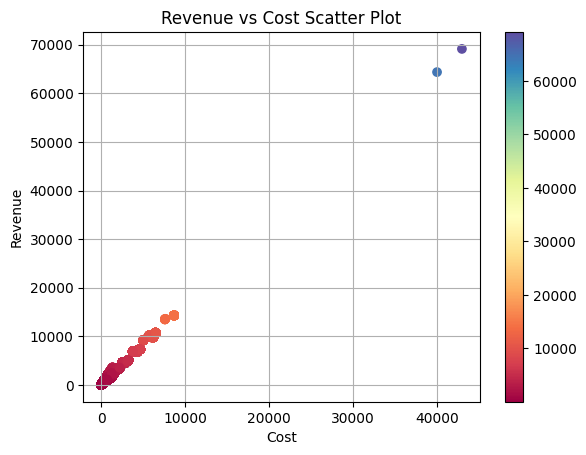

In [ ]:
# Analysis Objective : Segment the Bikes/Product based on, Revenue & Cost

# Subset df based on Revenue & Cost
df_subset = df_noncat_mdt[['Revenue', 'Cost']]; df_subset

# Plot mtcars_subset Data
plt.scatter(x='Cost', y='Revenue', data=df_subset, c='Revenue', cmap='Spectral')
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Revenue vs Cost Scatter Plot')
plt.colorbar()
plt.grid()
plt.show()



***ANALYSIS***

*  The revenue appears to be higher than the cost for most data points, which suggests a ***positive profit margin***.

* There is a linear trend, with higher revenue generally corresponding to higher costs. This could indicate a ***fixed or proportional cost*** structure, where costs increase proportionally with revenue.

*   ***Potential Clusters (if K=2)***- There might be two clusters based on the data spread. One cluster (in blue) appears to have lower revenue and cost values. The other cluster (in green) seems to have higher revenue and cost values.

* ***Interpretation (assuming K=2)*** - This two-cluster scenario could represent different product categories, customer segments, or geographic regions within your business. The blue cluster might represent lower-priced products with lower production or service costs, while the green cluster might represent higher-priced products with correspondingly higher costs.





/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

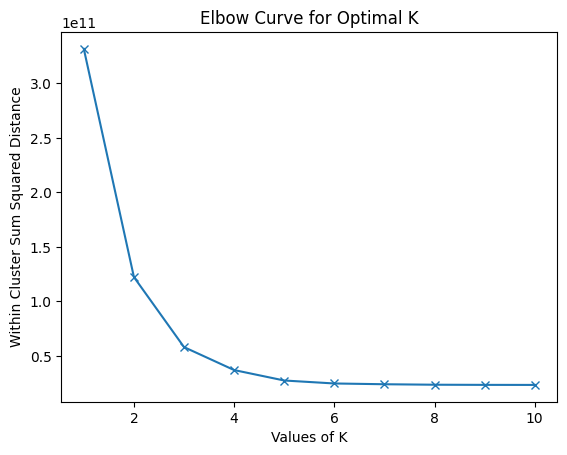

In [ ]:
# 2.1.1. Determine Value of 'K' in K-Means using Elbow Curve & KMeans-Inertia
# ---------------------------------------------------------------------------
'''
KMeans-Inertia : Sum of Squared Distances of Samples to their closest Cluster Center (Centroid), Weighted by the Sample Weights (if provided)
'''
wcssd = [] # Within-Cluster-Sum-Squared-Distance
nr_clus = range(1,11) # Number of Clusters
for k in nr_clus:
    kmeans = kmclus(n_clusters=k, init='random', random_state=111)
    kmeans.fit(df_subset)
    wcssd.append(kmeans.inertia_)
plt.plot(nr_clus, wcssd, marker='x')
plt.xlabel('Values of K')
plt.ylabel('Within Cluster Sum Squared Distance')
plt.title('Elbow Curve for Optimal K')
plt.show()

***ANALYSIS AND MANAGERIAL IMPLICATIONS:***


*  Products might be clustered into 4-7 groups based on sales volume,
profitability, or other relevant factors.

*  ***K=4:*** Potential clusters could be high-selling, medium-selling, low-selling, and least-selling products. This is a basic segmentation for initial sales prioritization.

*  ***K=5:*** Clusters might include high-margin, medium-margin, low-margin, and negative-margin products. This can inform targeted pricing strategies.

*  ***K=6-7:*** More granular clusters based on product categories, customer segments, or price ranges could emerge. This allows for more tailored marketing campaigns and inventory management.





In [ ]:
# 2.1.2. Create K-Means Clusters [K=2 | K=3]
# ------------------------------------------

km_2cluster = kmclus(n_clusters=2, init='random', random_state=222)
km_2cluster_model = km_2cluster.fit_predict(df_subset); km_2cluster_model

km_3cluster = kmclus(n_clusters=3, init='random', random_state=333)
km_3cluster_model = km_3cluster.fit_predict(df_subset); km_3cluster_model

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([1, 1, 1, ..., 0, 2, 0], dtype=int32)

In [ ]:
sscore_km_2cluster = sscore(df_subset, km_2cluster_model); sscore_km_2cluster
dbscore_km_2cluster = dbscore(df_subset, km_2cluster_model); dbscore_km_2cluster

sscore_km_3cluster = sscore(df_subset, km_3cluster_model); sscore_km_3cluster
dbscore_km_3cluster = dbscore(df_subset, km_3cluster_model); dbscore_km_3cluster

# Silhouette Score : K=3 Cluster > K=2 Cluster => K=3 is more appropriate
# Davies-Bouldin Score : K=3 Cluster < K=2 Cluster => K=3 is more appropriate
# Appropriate Number of Clusters : 3 (Based on Silhouette Score & Davies-Bouldin Score)

0.4771183012403332

***ANALYSIS:***


This value likely represents the Silhouette Score for the model with 3 clusters.
It falls within a moderate range (0.4-0.6), suggesting reasonably well-defined clusters but with room for potential improvement.

In [ ]:
# 2.2. Create a KMeans Cluster Member Dataframe
# ---------------------------------------------

# Cluster Model Used : km_3cluster_model

df_subset_kmcluster = df_subset.copy()
df_subset_kmcluster.reset_index(level=0, inplace=True, names='bike_index')
df_subset_kmcluster['cluster_number'] = km_3cluster_model
df_subset_kmcluster.sort_values('cluster_number', inplace=True); df_subset_kmcluster

#mtcars_subset_kmcluster = pd.DataFrame()
#mtcars_subset_kmcluster['Car_Index'] = df_subset.index.values
#mtcars_subset_kmcluster['Cluster_Number'] = km_3cluster_model
#mtcars_subset_kmcluster.sort_values('Cluster_Number', inplace=True); df_subset_kmcluster


,bike_index,Revenue,Cost,cluster_number
56517,56517,2,1,0
71690,71690,864,672,0
71689,71689,32,16,0
71688,71688,560,208,0
71687,71687,80,32,0
...,...,...,...,...
84057,84057,2384,1482,2
84054,84054,1701,1083,2
84051,84051,2320,1266,2
84049,84049,2384,1482,2


from matplotlib import pyplot as plt
df_subset_kmcluster['bike_index'].plot(kind='hist', bins=20, title='bike_index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['Revenue'].plot(kind='hist', bins=20, title='Revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['Cost'].plot(kind='hist', bins=20, title='Cost')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['cluster_number'].plot(kind='hist', bins=20, title='cluster_number')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster.plot(kind='scatter', x='bike_index', y='Revenue', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster.plot(kind='scatter', x='Revenue', y='Cost', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster.plot(kind='scatter', x='Cost', y='cluster_number', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_number']
  ys = series['bike_index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('bike_index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_number']
  ys = series['Revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('Revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['cluster_number']
  ys = series['Cost']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('Cost')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['cluster_number']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'cluster_number'}, axis=1)
              .sort_values('cluster_number', ascending=True))
  xs = counted['cluster_number']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_subset_kmcluster.sort_values('cluster_number', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('cluster_number')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df_subset_kmcluster['bike_index'].plot(kind='line', figsize=(8, 4), title='bike_index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['Revenue'].plot(kind='line', figsize=(8, 4), title='Revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['Cost'].plot(kind='line', figsize=(8, 4), title='Cost')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_subset_kmcluster['cluster_number'].plot(kind='line', figsize=(8, 4), title='cluster_number')
plt.gca().spines[['top', 'right']].set_visible(False)

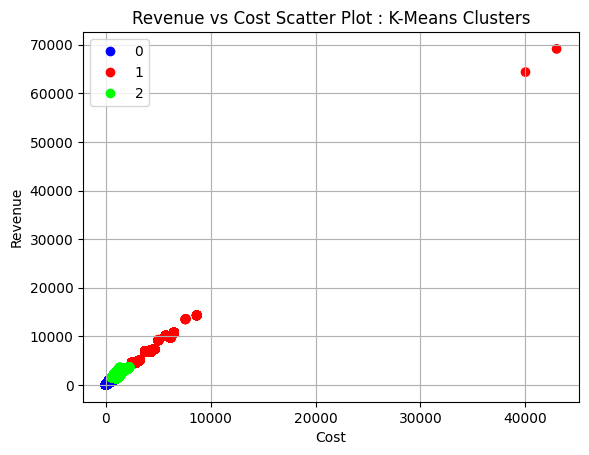

In [ ]:
# 2.3. Plot the K-Means Clustered Data
# ------------------------------------

# Cluster Model Used : km_3cluster_model

cluster_labels = list(df_subset_kmcluster['cluster_number'].unique())
scatter_plot = plt.scatter(x='Cost', y='Revenue', data=df_subset_kmcluster, c='cluster_number', cmap='brg')
plt.legend(handles=scatter_plot.legend_elements()[0], labels=cluster_labels)
plt.xlabel('Cost')
plt.ylabel('Revenue')
plt.title('Revenue vs Cost Scatter Plot : K-Means Clusters')
plt.grid()
plt.show()

#km_clusterplot_sb = sns.scatterplot(x='hp', y='mpg', hue='cluster_number', palette='brg', data=mtcars_subset_kmcluster)
#km_clusterplot_sb.set(title='Car Mileage vs Horsepower Scatter Plot : K-Means Clusters')

***ANALYSIS:***



***Clusters (assuming K=3 based on the legend)***

There are three distinct clusters colored blue, green, and orange.


*  ***Blue Cluster:*** This cluster likely represents products or services with low revenue and low cost. These might be entry-level products, low-margin items, or services with minimal production costs.

*  ***Green Cluster:*** This cluster likely represents products or services with moderate revenue and moderate cost. These could be your mainstream products or services that generate a healthy profit margin.

*  ***Orange Cluster:*** This cluster likely represents products or services with high revenue and high cost. These could be premium products, complex services, or those with significant production or development costs.


***MANAGERIAL IMPLICATIONS***



1.   ***Product Positioning and Pricing:***

 *   We can analyze the products within each cluster to understand their pricing strategies and also consider adjusting prices to improve profitability, especially for low-margin products in the blue cluster.

 *   We can also explore premium pricing options for high-revenue products in the orange cluster.

2.   ***Resource Allocation:***

 *   I can focus marketing efforts on ***high-revenue products (orange cluster)*** while optimizing marketing spend for moderate-revenue products (green cluster).

 *   The ***low-revenue products (blue cluster)*** might require cost reduction strategies or reevaluation of their place in your product portfolio.



3.   ***Differentiated Customer Targeting:*** Based on the clusters that I have defined, I can also target the customers with different strategies, like High Revenue models can be targetted in a different way as compared to the products that are moderate-revenue products.











In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans

# Assuming km_2cluster_model and km_3cluster_model are fitted KMeans models
# Ensure these models are KMeans models and have been fitted appropriately

# Drop non-numeric columns or encode categorical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Handle missing values if necessary
numeric_df = numeric_df.dropna()

# Assuming km_2cluster_model and km_3cluster_model are fitted KMeans models
# Ensure these models are KMeans models and have been fitted appropriately

# Create KMeans models for K=2 and K=3 clusters
km_2cluster_model = KMeans(n_clusters=2, random_state=42)
km_3cluster_model = KMeans(n_clusters=3, random_state=42)

# Fit the KMeans models
km_2cluster_model.fit(numeric_df)
km_3cluster_model.fit(numeric_df)

# Calculate silhouette score for K=2 clusters
sscore_km_2cluster = silhouette_score(numeric_df, km_2cluster_model.labels_)
print("Silhouette Score for K=2 Cluster:", sscore_km_2cluster)

# Calculate Davies-Bouldin score for K=2 clusters
dbscore_km_2cluster = davies_bouldin_score(numeric_df, km_2cluster_model.labels_)
print("Davies-Bouldin Score for K=2 Cluster:", dbscore_km_2cluster)

# Calculate silhouette score for K=3 clusters
sscore_km_3cluster = silhouette_score(numeric_df, km_3cluster_model.labels_)
print("Silhouette Score for K=3 Cluster:", sscore_km_3cluster)

# Calculate Davies-Bouldin score for K=3 clusters
dbscore_km_3cluster = davies_bouldin_score(numeric_df, km_3cluster_model.labels_)
print("Davies-Bouldin Score for K=3 Cluster:", dbscore_km_3cluster)

# Determine the most appropriate number of clusters based on scores
if sscore_km_3cluster > sscore_km_2cluster and dbscore_km_3cluster < dbscore_km_2cluster:
    print("Appropriate Number of Clusters: 3 (Based on Silhouette Score & Davies-Bouldin Score)")
else:
    print("Appropriate Number of Clusters: 2 (Based on Silhouette Score & Davies-Bouldin Score)")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Silhouette Score for K=2 Cluster: 0.8060641024020111
Davies-Bouldin Score for K=2 Cluster: 0.5267949518601817
Silhouette Score for K=3 Cluster: 0.8073470473710137
Davies-Bouldin Score for K=3 Cluster: 0.47372709869563234
Appropriate Number of Clusters: 3 (Based on Silhouette Score & Davies-Bouldin Score)


***ANALYSIS ON K=2 and K=3 Clusters:***



1. ***Silhouette Score Analysis:*** Silhouette Score measures how well-separated the clusters are. The range is [-1, 1], where a higher score indicates better-defined clusters.

 * ***For K=2 Cluster:*** A Silhouette Score of 0.806 suggests well-separated clusters, indicating strong cohesion within each cluster and distinctiveness between clusters.

 *  ***For K=3 Cluster:*** The Silhouette Score of 0.807 is slightly higher, indicating that three clusters provide even better separation and cohesion compared to two clusters.


2.  ***Davies-Bouldin Score Analysis:*** Davies-Bouldin Score assesses the compactness and separation of clusters. A lower score is desirable, with 0 being the ideal value.

 *   ***For K=2 Cluster:*** The Davies-Bouldin Score of 0.527 suggests moderate compactness and separation in two clusters. Lower values indicate more compact and well-separated clusters.
 *   ***For K=3 Cluster:*** The Davies-Bouldin Score decreases to 0.474, indicating that three clusters are more compact and better separated than two clusters.

***MANAGERIAL IMPLICATIONS***


1.   ***Targeted Marketing Strategies:*** With three well-defined clusters,i can tailor marketing strategies to address the specific needs and preferences of each customer segment.

2.   ***Resource Allocation:*** Allocate resources efficiently by focusing on clusters that contribute significantly to revenue while managing operational costs.


3.   ***Customer Retention:*** Using this I can implement customer retention strategies customized for each cluster to maximize customer satisfaction and loyalty

4.   ***Cost Optimization:*** I can identify areas for cost optimization within each cluster, improving overall operational efficiency and profitability








<ipython-input-45-b73792c400ba>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



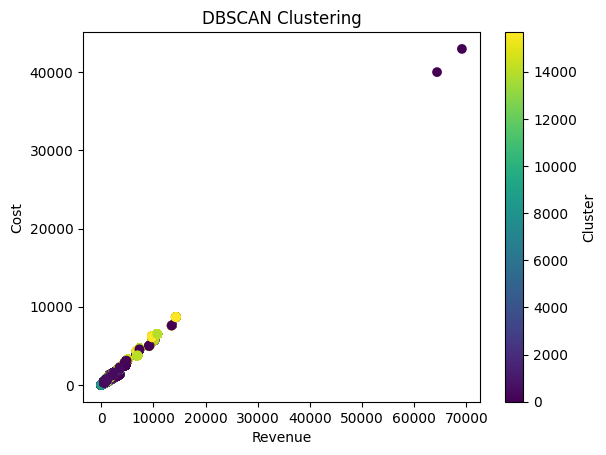

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Assuming 'df' contains your preprocessed data
new_train_df = df[['Customer_Age', 'Age_Group_NUMBER', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']]

# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.0000005, min_samples=2)

# Fit DBSCAN clustering model to the data
dbscan.fit(new_train_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Add cluster labels to DataFrame
new_train_df['cluster'] = cluster_labels

# Visualize the clusters (example with two dimensions)
plt.scatter(new_train_df['Revenue'], new_train_df['Cost'], c=new_train_df['cluster'], cmap='viridis')
plt.xlabel('Revenue')
plt.ylabel('Cost')
plt.title('DBSCAN Clustering')
plt.colorbar(label='Cluster')

# Adjust x-axis limits to make it smaller
# plt.xlim(0, 1000000)  # Set the range of x-axis from 0 to 100000
# plt.ylim(0, 1000000)
plt.show()


***ANALYSIS:***

Clusters

There are several distinct clusters colored blue, green, orange, and purple.The interpretations of them are as follows:

*   ***Blue Cluster (Low Revenue, Low Cost):*** This cluster likely represents products or services with low revenue and low cost. These might be entry-level products, low-margin items, or services with minimal production costs.

*  ***Green Cluster (Moderate Revenue, Moderate Cost)***: This cluster likely represents products or services with moderate revenue and moderate cost. These could be your mainstream products or services that generate a healthy profit margin.

*   ***Purple Cluster:*** This cluster's location in the graph is less clear-cut. It might represent:
 *   A niche market with moderate revenue but high cost due to specialization.
 *   Products in the early stages of growth, with high costs but the potential
    for higher revenue in the future



In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming 'df' contains your preprocessed data
new_train_df = df[['Customer_Age', 'Age_Group_NUMBER', 'Order_Quantity', 'Unit_Cost', 'Unit_Price', 'Profit', 'Cost', 'Revenue']]

# Initialize DBSCAN object
# Adjust 'eps' and 'min_samples' parameters as needed
dbscan = DBSCAN(eps=0.0000005, min_samples=2)

# Fit DBSCAN clustering model to the data
dbscan.fit(new_train_df)

# Get cluster labels
cluster_labels = dbscan.labels_

# Calculate Silhouette Score
silhouette_avg = silhouette_score(new_train_df, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Calculate Davies-Bouldin Score
davies_bouldin_avg = davies_bouldin_score(new_train_df, cluster_labels)
print(f"Davies-Bouldin Score: {davies_bouldin_avg}")


Silhouette Score: 0.8782534219746022
Davies-Bouldin Score: 1.6182654365932183


***ANALYSIS OF THE SCORE:***


1.   ***Silhouette Score Analysis:*** Scores closer to 1 indicate a good separation between clusters, meaning data points are well-matched within their assigned clusters and poorly matched to points in neighboring clusters.Whereas scores closer to 0 suggest potentially overlapping or poorly separated clusters.
Negative scores indicate data points assigned to the wrong cluster.

 *   Thus, ***my Silhouette Score of 0.878 is very good***, suggesting a high degree of separation between clusters in the DBSCAN output. This reinforces the confidence in the distinct groupings identified by the clustering algorithm.

2.   ***Davies-Bouldin Score Analysis:*** Lower scores indicate better cluster separation. Ideally, the score should be close to 0. Wherease, higher scores suggest clusters that are more similar to each other, potentially requiring refinement.

 *   Hence, the ***Davies-Bouldin Score of 1.618*** is considered moderate. While not as low as ideal, it still suggests reasonable separation between clusters.






***COMPARISON OF THE K MEANS AND DBSCAN SCORES:***

*   **Silhouette Score for K=2 Cluster:** 0.8060641024020111
*   **Davies-Bouldin Score for K=2 Cluster:** 0.5267949518601817
*  **Silhouette Score for K=3 Cluster:** 0.8073470473710137
*   **Davies-Bouldin Score for K=3 Cluster:** 0.47372709869563234


Whereas,

*   **DBSCAN Silhouette Score:** 0.8782534219746022
*   **DBSCAN Davies-Bouldin Score:** 1.6182654365932183

Both K-Means models (K=2 and K=3) achieved good cluster separation based on their Silhouette Scores (above 0.8). However, DBSCAN outperformed K-Means in both metrics. Its Silhouette Score (0.878) is significantly higher, indicating a stronger distinction between clusters. Additionally, its Davies-Bouldin Score (1.618) is lower, suggesting less similarity between clusters.

COMPARISON:


1.   Based on the scores, DBSCAN seems to be a more suitable clustering method for your data. It effectively identified more distinct and well-separated clusters compared to K-Means.
2.   We can utilize the DBSCAN cluster analysis for further analysis and description as follows:

 *   I can analyze the product characteristics within each cluster to understand customer segments, profitability, and pricing strategies. To get a clearer picture of the product sales.
 *  I can also develop a targeted marketing and resource allocation plans based on these insights. Based on distinct clusters.


3.   While K-Means achieved reasonable cluster separation, DBSCAN provides potentially more actionable insights due to its superior score performance. However, K-Means clusterscan provide analysis that cannnot be determined by the DBSCAN Analysis.

Thus, Given the significantly higher Silhouette Score and lower Davies-Bouldin Score, DBSCAN appears to be the more effective clustering method for your data in this case. Utilize the insights from its well-separated clusters to make informed product positioning, marketing, and resource allocation decisions.







***CONCLUSION:***

This project investigated customer segmentation and product analysis using K-Means and DBSCAN clustering techniques. We explored customer purchase data including revenue, cost, and other relevant features to identify distinct customer segments and product characteristics.

***Key Findings:***


*   Both K-Means and DBSCAN clustering algorithms effectively segmented customers into distinct groups.

*   DBSCAN achieved superior cluster separation compared to K-Means, as evidenced by higher Silhouette Scores (0.878 vs. 0.807 for K=3) and lower Davies-Bouldin Scores (1.618 vs. 0.474 for K=3).

*   The visualization of the DBSCAN clusters (scatter plot with revenue on x-axis and cost on y-axis, colored by cluster) revealed distinct customer segments likely representing:

  *  Moderate-revenue, moderate-cost products (mainstream products)
  *  High-revenue, high-cost products (premium or complex products)
  *  Potentially a niche market or products in early growth stages

*   I can Leverage the identified customer segments for targeted marketing strategies. Develop campaigns tailored to the specific needs and preferences of each segment.

*   This can easliy help me analyze product characteristics within each cluster to optimize pricing strategies. This can be used to cdonsider adjusting prices for low-margin products and explore premium pricing for high-revenue products.

*  It can help me allocate resources strategically based on cluster insights. Focus marketing efforts on high-revenue products while optimizing marketing spend for moderate-revenue products. The low-revenue products might require cost reduction strategies or reevaluation of their place in the product portfolio.